# From historical data to the future dynamics of returns

We have been working with a single asset, since factor model

Realized returns:

$$r^{i}=rf+\alpha_i + b_{i,f}(f-rf)+u_{i}$$

Expected  returns

$$E[r^{i}]=rf+\alpha_i + b_{i,f}E[f^e]$$


Expected excess returns

$$E[r^{e,i}]=\alpha_i + b_{i,f}E[f^e]$$

Variance:

$$Var(r^{i})=Var(rf+\alpha_i + b_{i,f}(f-rf)+u_{i})=Var(b_{i,f}(f-rf)+u_{i})$$

$$Var(r^{i})=b_{i,f}^2Var(f-rf)+Var(u_{i})$$


To know the expected returns of your investment you need
1. The risk-free rate
2. The beta 
3. The factor risk-premia
4. The asset specific alpha

To know the risk/variance of your investment you need
5. The factor variance
6. The factor specific variance
 

## What do we NEED to know to invest?

Do you want to know how this stock behaved in the past?

Do we want to know how it behaved in the recent past?

When should we care about historical data?



We need to know these paramenters for our investment period, say next month or next year

Some of those we observe directly in financial markets like the risk-free rate

others we need to use some data to form our views

I will discuss each one by one

## Betas 


- Some of those we observe directly in financial markets like the risk-free rate
- Others we can estimate well with relative short amount of data like beta, factor variances and idiossyncratic variance
- Factor risk-premia is harder, but for factors like the market we have long samples and we by an large use the average of these long historical samples to inform out views
  - And this is largely not the job of most quant investors. This macro view of the risk-premia in broad risk-factors is eitehr assumed to be a constant based on long samples, or  decided at the very top of the firm by a combination of leadership judgement, macro-analysis, and sometimes some forecasting.
  - but we will discuss this later in much detail. 
-  Alpha is exponentially harder!


## Variances



## Factor Risk-Premia


- While conceptually both alpha and risk premia are both expected excess returns, in practice our approach is very different

- Factor risk-premia might move around, but we think of then as more stable features of the economic environment

- They are compensation for systematic risk, so they don't go away just because investors are aware of it 

  - Specially true for risk-premia on the market factor

- We are more comfortable in using long data sets to measure it

-  


We will now look at the risk-premia on the market and discuss how to think about the estimation, how to think about the precision of these estimates and briefly discuss how it might move around over time



look at market risk-premia, mean , standard errors, sub samples

discuss how to think about reasonable sample sizes given the volatilities 

## Estimation of Alphas

Example with a few stocks. 

show beta well estimate. look at standard errors what ranges of beta are resonable given data

show alpha and standard errors

Then look at over time, say by year and show how all over the place it is. 

Can do time series and scatter plot of year on lagged year


## How do you find alpha?

- Estimating Alpha is hard!
- Every one in the business in searching for alpha
- So true alpha is
  - hard to find
  - disappears quickly
  - if the data was clear, people would already jumped at it
  - Once too much capital is in the trade we say that the trade is "crowded"
  - A Crowded trade can yield NEGATIVE alpha, even if the original idea was right!
  - You have to be right, but also early. 
  - If the trade gets crowded after you already in, it is good, you get the price moving in your direction and you close your position





## If not estimation then what?



- Valuation. You understand a business/market and think the market is not seeing what you are seeing. IT can be short-term insight, like a big client will cancel their services, or long-term prospects for the company business. 
  - Warren Buffet whole stick is about this. Read his letters to share-holders. It is all about finding good firms at good value
  - David Einhorn is another example. He famously betted against Leahman Brothers. 
  - Often this view will be formed by not only looking at balance sheets , but interacting with company insiders. Even though interactions are public, access allow a good fundamental analyst to see things more clearly (if you get private information, it is of course "earier" but it is illegal and you might end up in jail!)
  - Edge here is having good business judgment. You need to be confident that you are seeing something different form the market and you are right!
  
- Liquidity provision 
  - When firms are downgraded some fund are forced to sell, this often creates reversals
  - Similar effect happens when a firm is dropped from an index, say SP500
  - And it happens in reversal when it is added to the index
  - When mutual fund suffers outflows, they often have to sell, this often creates reversals
  
- Data that other people don't have.
  - Famous example are satellite pictures of parking lots of retail stores
  - Flow information of who is buying/selling what. Citadel securities for example.
  - flooding data, exposure to temperature, 
  - supplier data
  - See below a diagram by JP Morgan illustrating the variety of data sources




![Alternative Data](../../assets/plots/alternativedata.png)

Lets look at the moments over time to have a sense of how historical data is informative about the future data

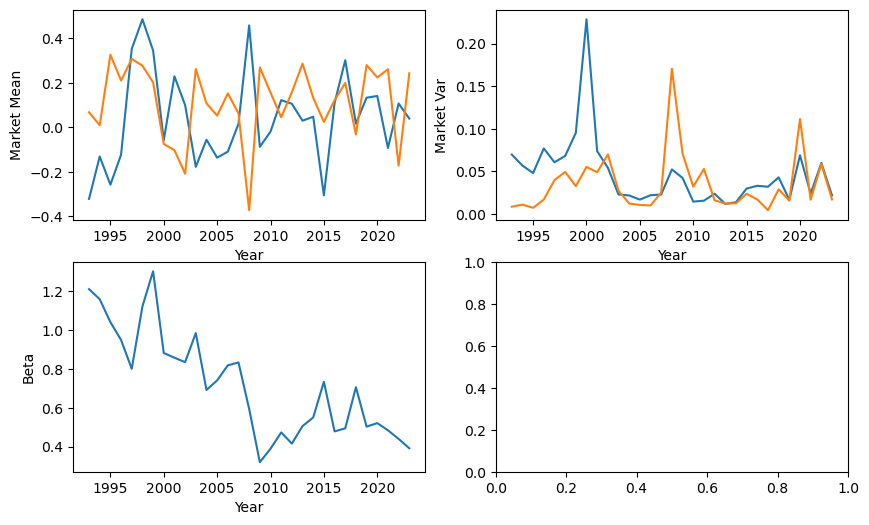

In [ ]:
asset='WMT'
# Create an empty list to store the results
results_list = []

# Loop through each year in the data
for year in df.index.year.unique():
    # Filter the data for the current year
    df_year = df[df.index.year == year]
    
    # Define the independent variable (SPY) and add a constant term
    X = sm.add_constant(df_year['SPY'])
    
    # Define the dependent variable (WMT)
    y = df_year[asset]
    
    # Fit the regression model
    model = sm.OLS(y, X).fit()
    
    # Extract the alpha (intercept) and beta (slope) coefficients
    alpha = model.params['const']*252
    beta = model.params['SPY']
    idio_var = model.resid.var()*252
    factor_var=df_year.SPY.var()*252
    factor_mean=df_year.SPY.mean()*252
    # Append the results to the list
    results_list.append({'Year': year, 'Alpha': alpha, 'Beta': beta, 'Idio Var': idio_var, 'Factor Var': factor_var, 'Factor Mean': factor_mean})

# Convert the list to a DataFrame
results = pd.DataFrame(results_list)

# Set the 'Year' column as the index
results.set_index('Year', inplace=True)

# Display the results
fig, ax = plt.subplots(2,2,figsize=(10, 6))

results['Alpha'].plot(ax=ax[0,0], ylabel='Alpha')

results['Beta'].plot(ax=ax[1,0], ylabel='Beta')

results['Idio Var'].plot(ax=ax[0,1], ylabel='Idio Var')

results['Factor Var'].plot(ax=ax[0,1], ylabel='Market Var')

results['Factor Mean'].plot(ax=ax[0,0], ylabel='Market Mean')
plt.show()

What do you notice?

Which one historical data seem more informative about the future?

What is another way to see this? For example for the alpha and the beta?

- Historical beta seems to be informative about future beta
- Historical alpha seems uninformative about future alpha
- Historical volatilities seem to be informative about future volatilities

## Find the Alpha, clean the Beta



## The Normal distribution

* Most of what we do does not depend on the assumption of normality

* But normal distributions are very useful in statistical tests

* And they are also not a bad approximation for return data at low frequency (monthly/year) 

* Probability that any random draw form a Normal distribution random variable $\tilde{x}$ is within $n=1$ standard deviation from the mean is 0.6826


$$Prob(E[\tilde{x}]-1\sigma(\tilde{x})\leq \tilde{x}\leq E[\tilde{x}]+1\sigma(\tilde{x}))=0.6826$$

* $n=2,Prob(\cdot)=0.9550$

$$Prob(E[\tilde{x}]-2\sigma(\tilde{x})\leq \tilde{x}\leq E[\tilde{x}]+2\sigma(\tilde{x}))=0.9550$$
* it is convenient to to transform a normally distributed r.v. into units of standard deviations from it's mean


$$\tilde{z}=\frac{\tilde{x}-E[\tilde{x}]}{\sigma(\tilde{x})}$$

* This follows the "standard" normal distribution, which has mean 0 and and standard deviation 1 

* can you show that is indeed the case that z has mean zero and standard devaiton 1? 

* This means that the normal distribution is completely characterized by it's first two moments

* This means that the investment problem is much more tractable too!

* Only two moments to worry about:

    * The expected return of the portfolio
    
    * it's variance
    
    * The probability of really bad tail events will follow immediately from these two! 

In [ ]:
(Data.MKT-Data.RF).mean()*100

0.5140340030911901

**Why looking at things in terms of Excess returns is important ?**

1. All asset returns have both the risk-free component in it and the risk-premium component.

1. The risk-free component is directly observed-- for example in dollars it is convention to use the yield on the 3 month US treasury bill

     1.  The average risk-free rate of the last 30 years tells you nothing about the risk-less rate today BECAUSE you can directly observe what it is today. It is literally the rate of return that you get for sure if you buy a tbill and hold until maturity (3 months)--and this rate of return is know in advance because we know the final price of the tbill.

1. The particular instrument that you use to measure the risk-free rate might vary depending on a variety of complicated considerations

     - Is it funded instrument vs not funded (bills vs swaps)
     - Accessible to everyone or only some traders (bill vs fed funds)
     - Can you borrow at this rate (bills vs your broker lending rate)

1. the important point is that at any given moment you know the true risk-free rate. There is no point in estimating it


**Trading Interpretation**

* Excess returns have a nice trading interpretation.

* For example the excess return on the market (portfolio) is

$$R^{e,MKT}=R^{MKT}-R^F$$

* This is really a portfolio that has weights 1 on the market and -1 on the risk-free rate

* This type of portfolio is very important

* We call it a "self-financed portfolio" or "zero cost portfolio"

* The key is you are not putting any capital in it because you borrow 1 dollar to invest 1 dollar in the market (or in any other assets)

**Practical considerations and frictions** 

* we will discuss this later, but in practice you always have to put some capital on the trade

* some investors don't really need to put much like banks and dealers, but others like retail investors are asked to put much more.And often the amount of capital that you have to put on a "zero-cost" trade fluctuates with liquidity conditions (a lot during crises, not much during booms) 

* These portfolios are nevertheless super useful empirically to understand the data even if in the real world you cannot directly buy the zero cost portfolios without putting capital



OLD

  * i.e. how much more I would get if I invested in the market instead of a short-term risk-free U.S. treasury bond

  * We call the **Expected difference**, the <b>Risk-Premium</b>

      $$E[R_i^e]=E[R_i-R_f]$$

  * It is how much more you EXPECT to get by investing in asset $i$ instead of the risk-free asset

  * This is about the FUTURE, not the past. It is about what we expect at date t about the future t+1 date

   $$E_t[R_{t+1,i}^e]=E_t[R_{t+1,i}-R_{t,f}]$$

   $$E_t[R_{t+1,i}^e]=E_t[R_{t+1,i}]-R_{t,f}$$


  * When asset $i$ is the total market portfolio of US equities, we call this, the <b>Equity Risky Premium</b>

  **The Equity Risky Premium**

The expected difference in return earned by investing in the aggreagate stock market portfolio instead of the risk-free rate


  $$E[R_{MKT}-R_f]$$

One good estimate of it simply uses the sample mean

# Residula Factor models

Need to put after portfolio I think

## Variance decomposition

We now focus on the first case. The assumption that $u_{i,t}$ are uncorrelated across assets is never really satisfied

But it can be achieved approximately

We will see how we can compute covariance matrixes easily under such an assumption

first we will do so using a single factor

In this case the assumption is very bad...and not even close to holding for most assets...but will allow us to get the intuition

We will then learn how to do it with many factors as is standard in the industry





$$r^{e,i}=a_i+b_{i,f}f+u_{i}$$

- non-factor component $u_i$ of the asset return of asset $i$. Assumed to uncorrelated between any two assets

Now this is just a regression!

We have that

$$Var(r^i)=b_i^2Var(f)+var(u_{i})$$


This gives us a nice decomposition of risk

- the risk component that is driven by the common factor
- the asset specific comment


Now if our assumption holds, $cov(u_{i,t},u_{j,t})=0$

Then 

$$Cov(r_t^i,r_t^j)=Cov(a_i+b_{i}f_t+u_{i,t},a_j+b_{j}f_t+u_{j,t})=b_ib_jVar(f_t)$$

And the covariance matrix is simply


$$
\left[\begin{array}{cc}
b_i^2 & b_ib_j \\
b_ib_j &  b_j^2 
\end{array}\right]var(f_t)+\left[\begin{array}{cc}
var(u_{i,t}) & 0 \\
0&  var(u_{j,t})
\end{array}\right]$$

We see that now for N assets we only need to estimate N factor exposures, N asset specific volatilities , and the factor volatility

>$2N+1$ vs $(N^2-N)/2+N$


That is a huge difference


Suppose we have many assets, all respecting this factor model. Say $R_t$ is the big N by 1 vector of excess return $[r_{1,t},r_{2,t},...]$ for all these assets

$$R_t^e=Bf_t+U_t$$

where $B$ is also a N by 1 vector of exposures $[b_1,b_2,...b_N]$  and $u_t$ is the N by 1 vector of shocks 


Then their variance-covariance matrix is simply


$$Var(R^e_t)=B @ B' Var(f_t)+ Var(U_t)$$

- Armed with the variance covariance of assets we have the variance of any portfolio of these assets (wait!)

 


### Application: Market model






In [ ]:
from datetime import datetime

# Create a date parser function that will allow pandas to read the dates in the format we have them
date_parser = lambda x: datetime.strptime(x, "%Y%m")
# our 50 stock returns data

url = "https://raw.githubusercontent.com/amoreira2/Fin418/main/assets/data/Retuns50stocks.csv"

# Use pd.read_csv with the date_parser
df  = pd.read_csv(url, parse_dates=['date'], date_parser=date_parser)
# Set the date column as the index

# first, create the DataFrame
df.set_index("date",inplace=True)
# put the returns in percentage format
df=df/100
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 180 entries, 2000-01-01 to 2014-12-01
Data columns (total 51 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   CTL     180 non-null    float64
 1   T       180 non-null    float64
 2   CSCO    180 non-null    float64
 3   FCX     180 non-null    float64
 4   XL      180 non-null    float64
 5   IVZ     180 non-null    float64
 6   AMT     180 non-null    float64
 7   WHR     180 non-null    float64
 8   IR      180 non-null    float64
 9   WFT     180 non-null    float64
 10  YUM     180 non-null    float64
 11  CVS     180 non-null    float64
 12  GD      180 non-null    float64
 13  TYC     180 non-null    float64
 14  EL      180 non-null    float64
 15  MUR     180 non-null    float64
 16  CTAS    180 non-null    float64
 17  CBSA    180 non-null    float64
 18  SNV     180 non-null    float64
 19  CAM     180 non-null    float64
 20  DLTR    180 non-null    float64
 21  CAH     180 non-null

In [ ]:
# load regression library
import statsmodels.api as sm
# add a constant to the independent variable
x= sm.add_constant(df['Market'])
# set the dependent variable to be the 'CTL' return
y= df['CTL']
# run the regression
results= sm.OLS(y,x).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    CTL   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     36.81
Date:                Mon, 29 Jan 2024   Prob (F-statistic):           7.62e-09
Time:                        18:02:15   Log-Likelihood:                 214.56
No. Observations:                 180   AIC:                            -425.1
Df Residuals:                     178   BIC:                            -418.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0019      0.006      0.340      0.734      -0.009       0.013
Market         0.7269      0.120      6.068      0.000       0.491       0.963
==============================================================================
Omnibus:                       43.729   Durbin-Watson:                   2.264
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              394.038
Skew:                           0.524   Prob(JB):                     2.73e-86
Kurtosis:                      10.172   Cond. No.                         21.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Interpretation:

The coefficient on the market estimates the exposure $b_{CTL}$. It is 0.72 and well estimate

- we see that the standard errors allow us to reject both zero (easy) and one (not as easy simnce the typical stock must have a beta of 1)

We see that the R-squared is 17% so the asset specific risk is sizable

* what fraction of CTL risk is due to the factor?

* how large is the non-factor component?


In [ ]:
# to get the residual volatility, we need to get the residuals and compute it's volatility
u= results.resid
print(u.std()*12**0.5)


0.25520301676928053


Lets now estimate the covariance matrix of these 50 stocks using this single-factor model

1. Run regression stock by stock
1. save betas, save residual variance
1. Use formula to construct variance matrix

In [ ]:
df.columns[:-1]

Index(['CTL', 'T', 'CSCO', 'FCX', 'XL', 'IVZ', 'AMT', 'WHR', 'IR', 'WFT',
       'YUM', 'CVS', 'GD', 'TYC', 'EL', 'MUR', 'CTAS', 'CBSA', 'SNV', 'CAM',
       'DLTR', 'CAH', 'DTE', 'SSP', 'PSA', 'EXC', 'TKR', 'CMA', 'ORCL', 'MS',
       'RSG', 'ACAS', 'AGN', 'MMM', 'ETFC', 'CAR', 'MDR', 'NOV', 'PCH', 'BAX',
       'JCI', 'SWK', 'DVN', 'TMO', 'PEP', 'LNC', 'EMR', 'MLM', 'CCI', 'NU'],
      dtype='object')

In [ ]:
Results=pd.DataFrame(index=df.columns[:-1],columns=['Beta','VarU'],dtype=float)
Factor=df['Market']
Assets=df.drop('Market',axis=1)
x= sm.add_constant(Factor)
for stocki in Assets.columns:
# set the dependent variable to be the 'CTL' return
    y= Assets[stocki]
    # run the regression
    results= sm.OLS(y,x).fit()
    Results.loc[stocki,'Beta']=results.params[1]
    Results.loc[stocki,'VarU']=results.resid.var()

Results

,Beta,VarU
CTL,0.726946,0.005427
T,0.529153,0.004093
CSCO,1.530779,0.006403
FCX,1.569894,0.011742
XL,1.438681,0.011752
IVZ,2.036247,0.004851
AMT,1.352478,0.027122
WHR,1.442238,0.008598
IR,1.461150,0.005901
WFT,1.513599,0.010939


1. How do we compute the share of factor risk in each asset?

2. Say I have a portfolio holding 50% in CSCO and 50% in CCI what is the share of factor risk in the portfolio?

In [ ]:
import numpy as np

# Assuming Results is your DataFrame and 'Beta' is your column
beta = Results['Beta'].values
# make sure beta is a column vector (and not di)
beta=beta.reshape(50,1)
# Compute the outer product of the 'Beta' column with itself
beta_matrix = beta @ beta.T
print(beta_matrix)
print(beta_matrix.shape)

# the unsystematic component is a diagonal matrix with the variance of the residuals on the diagonal
CovU=np.diag(Results['VarU'].values)

print(CovU)

print(CovU.shape)

# construct the covariance matrix by adding the systematic and unsystematic components
Cov_F=beta_matrix*Factor.var()+CovU
print(Cov_F)

print(Cov_F.shape)



[[0.52845028 0.38466559 1.11279362 ... 0.63369045 1.21578277 0.32477868]
 [0.38466559 0.28000291 0.81001644 ... 0.46127124 0.88498354 0.23641048]
 [1.11279362 0.81001644 2.34328505 ... 1.334405   2.5601563  0.68390851]
 ...
 [0.63369045 0.46127124 1.334405   ... 0.75988907 1.4579043  0.38945793]
 [1.21578277 0.88498354 2.5601563  ... 1.4579043  2.79709901 0.74720431]
 [0.32477868 0.23641048 0.68390851 ... 0.38945793 0.74720431 0.19960476]]
(50, 50)
[[0.00542738 0.         0.         ... 0.         0.         0.        ]
 [0.         0.00409277 0.         ... 0.         0.         0.        ]
 [0.         0.         0.00640331 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.00510028 0.         0.        ]
 [0.         0.         0.         ... 0.         0.01439288 0.        ]
 [0.         0.         0.         ... 0.         0.         0.00218208]]
(50, 50)
[[0.0065499  0.0008171  0.00236376 ... 0.00134607 0.00258253 0.00068989]
 [0.0008171  0.004687

### Application: Minimum-variance investing


* it is mean-variance investing under the assumption that all assets have same expected returns, but uses covariance matrix to minimize risk

 * The idea is that expected returns signals are pure noise so we might as well assume there are no signals and all expected returns are the same
  
 * For example this is behind Minimum volatility investing for example, [https://investor.vanguard.com/mutual-funds/profile/VMVFX]
  
* Assumes all assets have the same expected return

$$Min~ X'Var(R)X~ subject~ to~ \mathbf{1}'X=1$$

The result of this problem is a vector of weights proportional to 

$$W_{minvariance}\propto Var(R)^{-1}\mathbf{1}$$

We then impose the constraint that the weights have to add-up to 1.

$$X_{minvariance}=\frac{Var(R)^{-1}\mathbf{1}}{\mathbf{1}^TVar(R)^{-1}\mathbf{1}}$$

* I use this technique in "hedging-risk factors", a recent academic paper, to construct portfolios with Sharpe-ratios of 0.8 at the yearly horizon, which is very large

> Why this might make sense?

So you see here that the problem is really identical to the mean-variance problem. We simply substituted the vector or Expected returns by a vector of ones.

The end result is that now the solution is the portfolio that minimizes variance while being fully invested as the constraint $\mathbf{1}'W=1$ means $\sum_i^I w_i*1=1$

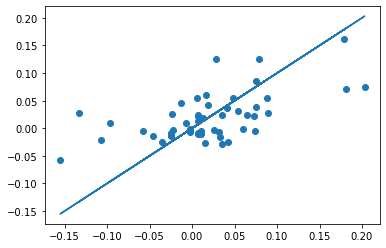

In [ ]:
# minimum variance portfolio using the factor-based covariance matrix
ones=np.ones([50,1])
X_minvarFactor=np.linalg.inv(Cov_F)@ ones/(ones.T @np.linalg.inv(Cov_F)@ ones)
# minimum variance portfolio using the unrestricted stock covariance matrix
Cov=Assets.cov()
X_minvar=np.linalg.inv(Cov)@ ones/(ones.T @np.linalg.inv(Cov)@ ones)

# plot the weights against each other
plt.plot(X_minvar,X_minvar)
plt.scatter(X_minvar,X_minvarFactor)



- What do you notice about the weights?
- How do we construct the returns of the strategy?
- What do we need to evaluate performance of the Factor-based approach vs the unrestricted approach?
   - Why can't we simply calculate Sharpe Ratios in the same data?